In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
engine_info_df = df[ ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'] ]
engine_info_df.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


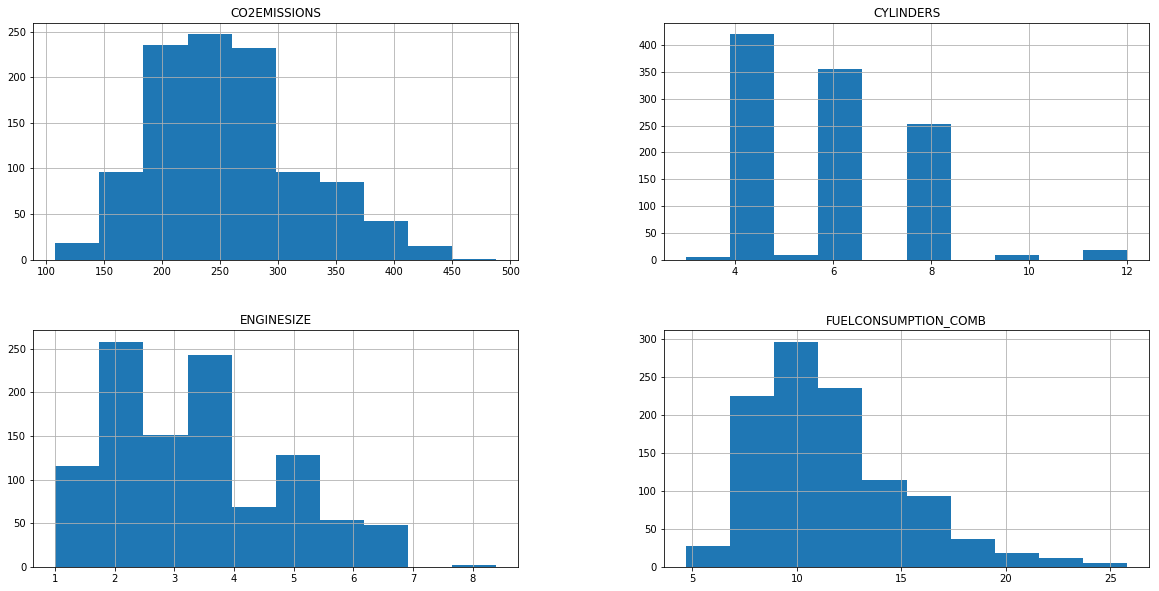

In [21]:
engine_info_df.hist()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

Text(0,0.5,'CO2EMISSIONS')

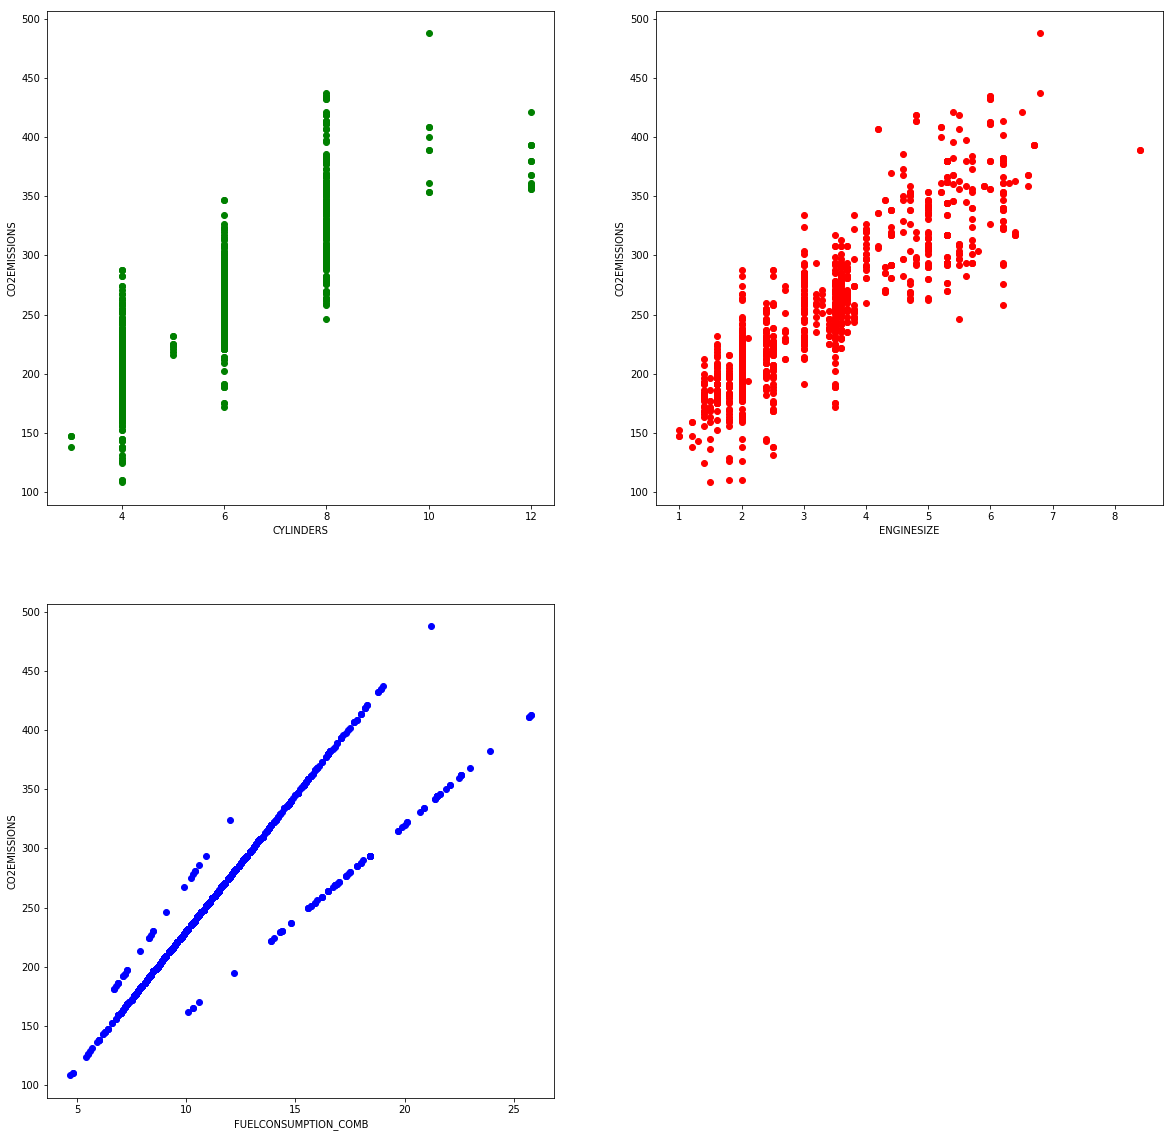

In [34]:
figure = plt.figure(figsize=(20,20))
size=(2,2)
ax1 = plt.subplot2grid(size,(0,0))
ax2 = plt.subplot2grid(size,(0,1))
ax3 = plt.subplot2grid(size,(1,0))

ax1.scatter( engine_info_df['CYLINDERS'] , engine_info_df['CO2EMISSIONS'], color = 'green' )
ax1.set_xlabel('CYLINDERS')
ax1.set_ylabel('CO2EMISSIONS')

ax2.scatter( engine_info_df['ENGINESIZE'] , engine_info_df['CO2EMISSIONS'], color = 'red' )
ax2.set_xlabel('ENGINESIZE')
ax2.set_ylabel('CO2EMISSIONS')

ax3.scatter( engine_info_df['FUELCONSUMPTION_COMB'] , engine_info_df['CO2EMISSIONS'], color = 'blue' )
ax3.set_xlabel('FUELCONSUMPTION_COMB')
ax3.set_ylabel('CO2EMISSIONS')

In [65]:
x = engine_info_df['ENGINESIZE']
y = engine_info_df['CO2EMISSIONS']

xTrain, xTest , yTrain , yTest = train_test_split(x,y, test_size= 0.2 )

In [66]:
slrm = linear_model.LinearRegression()
slrm.fit( np.array(xTrain).reshape(-1,1)  ,np.array(yTrain).reshape(-1,1) )
print('Coeficiente: ' , slrm.coef_ )
print('Intercept: ' , slrm.intercept_ )

Coeficiente:  [[39.22779985]]
Intercept:  [125.08070332]


Text(0,0.5,'Emission')

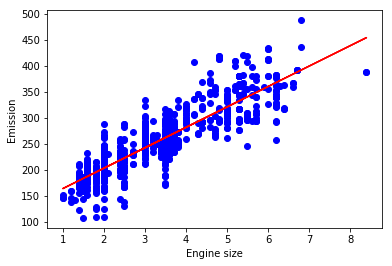

In [67]:
plt.scatter(xTrain, yTrain,  color='blue')
plt.plot(np.array(xTrain).reshape(-1,1), slrm.coef_[0][0]*np.array(xTrain).reshape(-1,1) + slrm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [68]:
xTest = np.array(xTest).reshape(-1,1)
yTest = np.array(yTest).reshape(-1,1)
ypred = slrm.predict(xTest)

print("Mean absolute error: %.2f" % np.mean(np.absolute(ypred - yTest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((ypred - yTest) ** 2))
print("R2-score: %.2f" % r2_score(ypred , yTest) )

Mean absolute error: 23.02
Residual sum of squares (MSE): 908.63
R2-score: 0.72


In [69]:
slrm.predict(3)

array([[242.76410286]])